# Chapter 9: Plotting and Visualization

In [1]:
# Follow along!
# %matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time, datetime

In [3]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

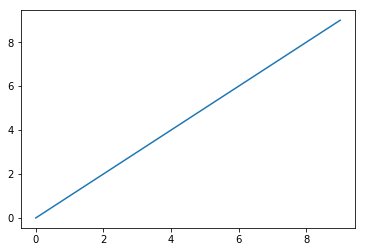

In [4]:
# So coool!!!! Simple line plot is served!
plt.plot(data)

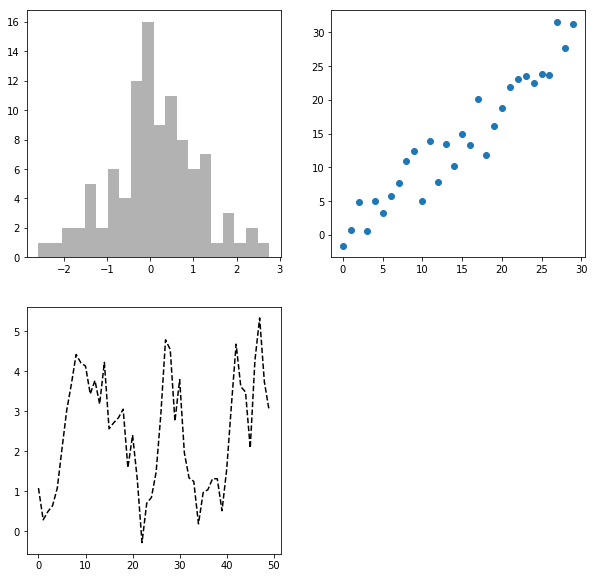

In [5]:
# matplotlib plots live in a Figure object
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

plt.plot(np.random.randn(50).cumsum(), 'k--')

# Use AxesSubplot objects to plot
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

(array([ 1.,  2.,  3.,  7., 23., 23., 18., 16.,  3.,  4.]),
 array([-3.10422604, -2.56793299, -2.03163994, -1.49534689, -0.95905384,
        -0.42276079,  0.11353226,  0.64982531,  1.18611835,  1.7224114 ,
         2.25870445]),
 <a list of 10 Patch objects>)

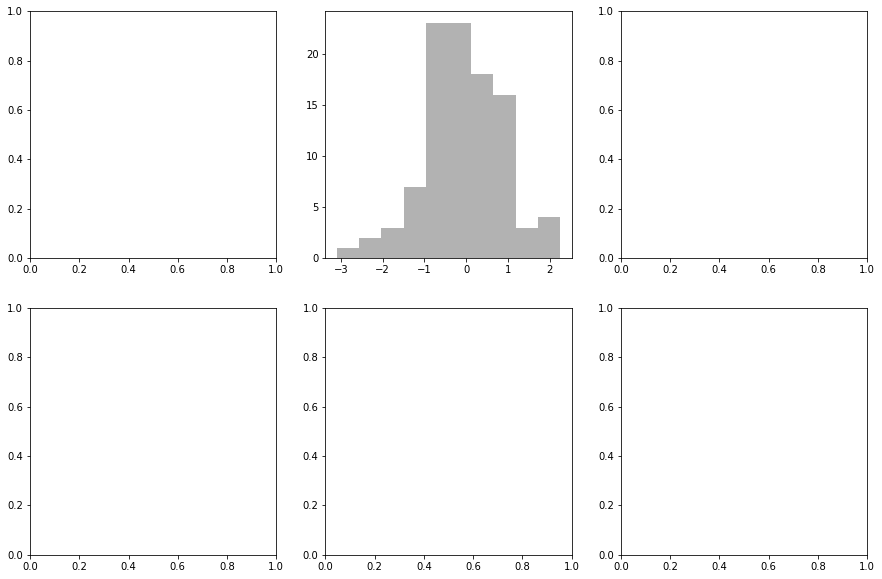

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))
axes[0, 1].hist(np.random.randn(100), bins=10, color='k', alpha=0.3)

# Adjust the padding and spacing
# Doesn't look good but tested!
# plt.subplots_adjust(wspace=0, hspace=0)

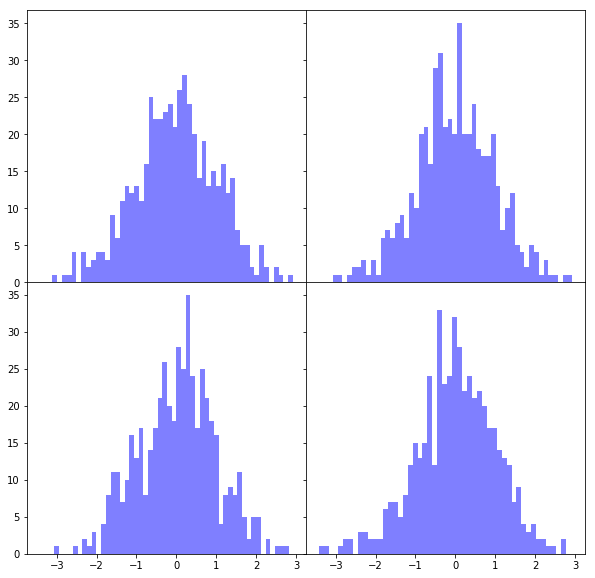

In [7]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 10))
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='b', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

In [8]:
# to plot x versus y with green dashes
# ax.plot(x, y, 'g--')

In [9]:
# more explicitly
# ax.plot(x, y, linestyle='--', color='g')

In [10]:
plt.plot?

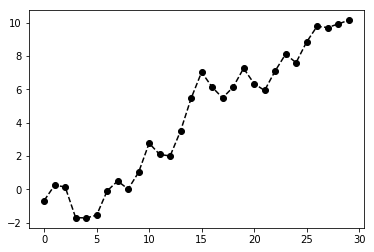

In [11]:
from numpy.random import randn

plt.plot(randn(30).cumsum(), 'ko--')

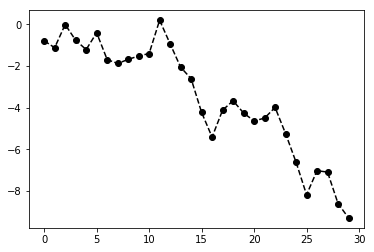

In [12]:
# Or more explicitly
from matplotlib.pyplot import plot

plot(randn(30).cumsum(), color='k', 
     linestyle='dashed',
     marker='o')

xlim: (-1.4500000000000002, 30.45)


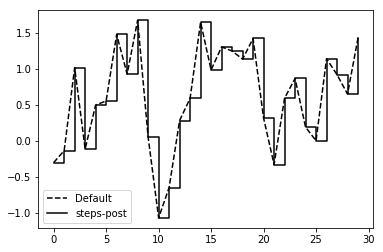

In [13]:
data = np.random.randn(30).cumsum()

plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post',
         label='steps-post')
plt.legend(loc='best')

print('xlim:', plt.xlim())

Text(0.5, 0, 'Stages')

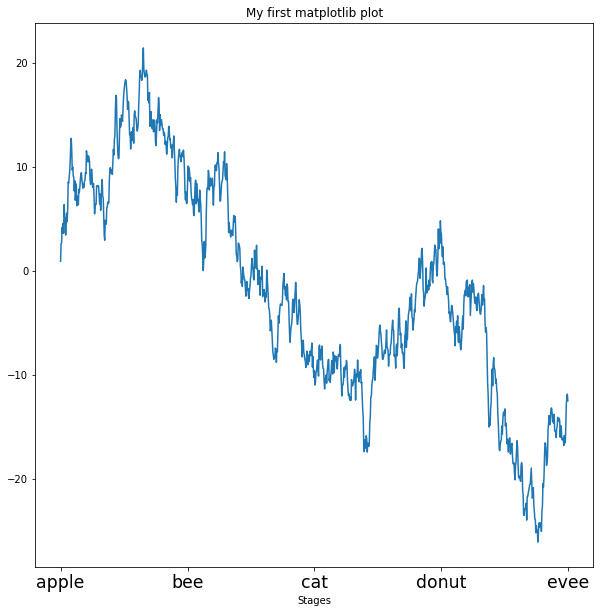

In [14]:
# Setting the title, axis labels, ticks and ticklabels
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

# Update the x-tick and x-label
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['apple', 'bee', 'cat', 'donut', 'evee'],
                            rotation=0, fontsize='xx-large')

# List of font.size
# small, medium, large, x-large, xx-large, larger

ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

In [15]:
# ax.set_xticklabels?

[Text(0.5, 0, 'Stages'), Text(0.5, 1.0, 'Another title here!')]

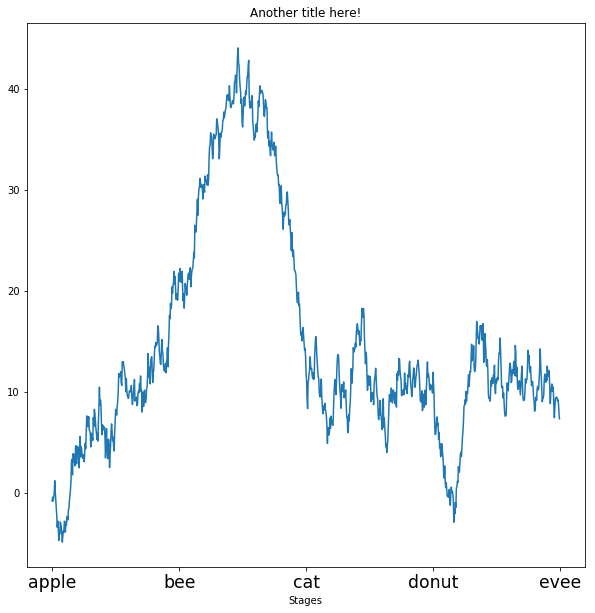

In [16]:
# Setting the title, axis labels, ticks and ticklabels
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

# Update the x-tick and x-label
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['apple', 'bee', 'cat', 'donut', 'evee'],
                            rotation=0, fontsize='xx-large')

# List of font.size
# small, medium, large, x-large, xx-large, larger

props = {
    'title': 'Another title here!',
    'xlabel': 'Stages'
}

ax.set(**props)

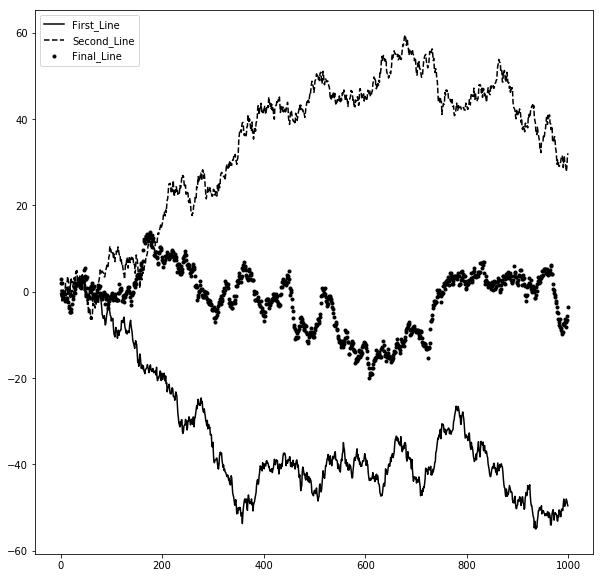

In [17]:
from numpy.random import randn

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='First_Line')
ax.plot(randn(1000).cumsum(), 'k--', label='Second_Line')
ax.plot(randn(1000).cumsum(), 'k.', label='Final_Line')
ax.legend(loc='best')

Text(0, 20, 'Hello World')

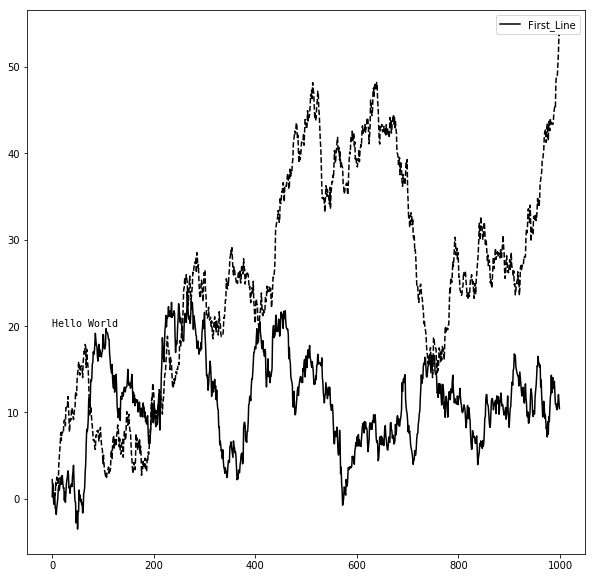

In [18]:
# If you want to exclude the legend from showing up

from numpy.random import randn

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='First_Line')

# Passing _nolegend_ to stop it from showing
ax.plot(randn(1000).cumsum(), 'k--', label='_nolegend_')
ax.legend(loc='best')

# Passing X, Y coordinate
ax.text(0, 20, 'Hello World',
        family='monospace', fontsize=10)

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

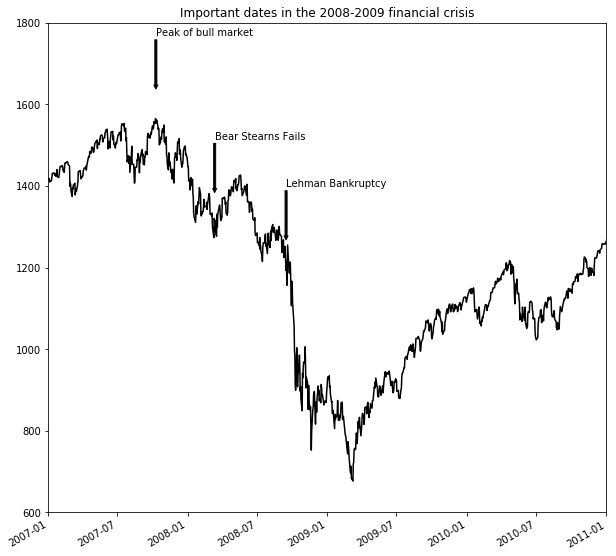

In [19]:
from datetime import datetime

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('pydata-book/examples/spx.csv',
                   index_col=0, parse_dates=True)

spx = data['SPX']
spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 10), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                # spx.asof(date) <<< THIS IS NEW, I HAVEN'T USE IT BEFORE
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black',
                                headwidth=4, 
                                width=2,
                                headlength=4),
                horizontalalignment='left',
                verticalalignment='top')
    
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

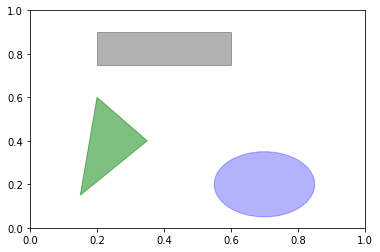

In [20]:
# Add shapes

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

# Basic save
# plt.savefig('figpath.png')

# Author's recommended save
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)

In [21]:
plot_data = buffer.getvalue()
plot_data

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xb0\x00\x00\x01 \x08\x06\x00\x00\x00\xd5(&i\x00\x00\x00\x04sBIT\x08\x08\x08\x08|\x08d\x88\x00\x00\x00\tpHYs\x00\x00\x0b\x12\x00\x00\x0b\x12\x01\xd2\xdd~\xfc\x00\x00\x009tEXtSoftware\x00matplotlib version 3.0.3, http://matplotlib.org/\x9d\x0b\xab\xa3\x00\x00 \x00IDATx\x9c\xed\xdd{t\x94\xe5\x9d\x07\xf0\xef;\x99\xdc\xb8\xe4\x06\t\x90L\x10\xc2\xb0\x91\x04\x83\xd4\x89\xc4\x0b7\xdd\x1a\xc9j\xac.R\xb4\xc7Ki\x1b-\xec\xda\xb2=\xea\xd9\xd3J\x05\xb1r\x8e\xd6\xb3[Q\xf7\xc4\xb2\xd2\x1e\x8f\xa1\xd6\xd3\xb3a[HOA\xc1j\xb9\x18`\xd5\x98b"\xe46!$\x13H2\xc9\xe4:3\xcf\xfe\xf14\xc44\x01\x02\xc9\xcc\xf3>3\xdf\xcf990\x99\x97\x99\x1f\x0f0_\x9e\xe7}\xde\xdfk\x08!\x04\x88\x88\x884cQ]\x00\x11\x11\xd1\xd5`\x80\x11\x11\x91\x96\x18`DD\xa4%\x06\x18\x11\x11i\x89\x01FDDZb\x80\x11\x11\x91\x96\x18`DD\xa4%\x06\x18\x11\x11i\x89\x01FDDZb\x80\x11\x11\x91\x96\x18`DD\xa4%\x06\x18\x11\x11i\x89\x01FDDZb\x80\x11\x11\x91\x96\x18`DD\xa4%\x06\x18\x11\x11i\x89\x01FDDZb\x80\x11\x11\x91

In [22]:
# plt.rc('figure', figsize=(10, 10))

In [23]:
font_options = {
    'family': 'monospace',
    'weight': 'normal',
    'size': 30
}

# plt.rc('font', **font_options)

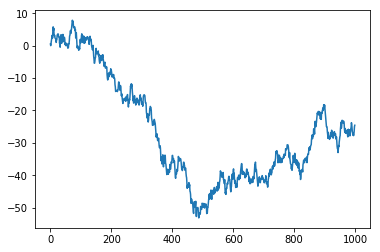

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

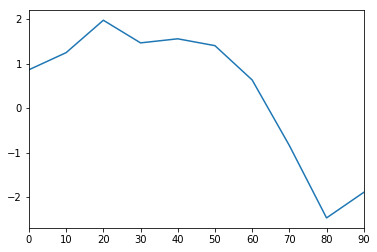

In [26]:
import seaborn as sns

# Using pandas's plot function
s = pd.Series(np.random.randn(10).cumsum(),
              index=np.arange(0, 100, 10))

s.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2581cb70>,
      dtype=object)

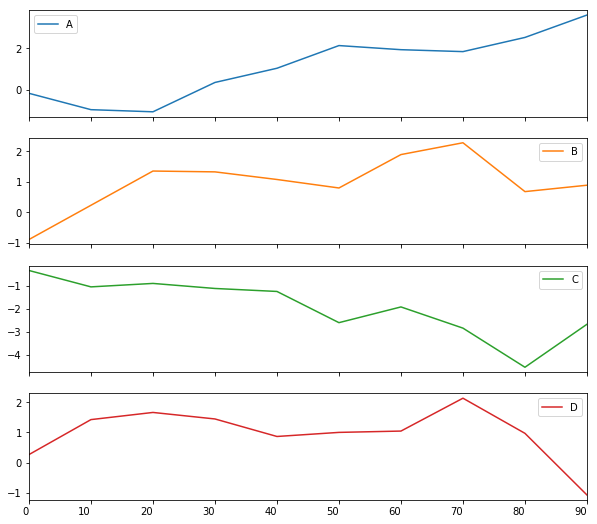

In [42]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns='A B C D'.split(),
                  index=np.arange(0, 100, 10))

df.plot(figsize=(10, 10), style='', grid=False, 
        subplots=True, rot=0)

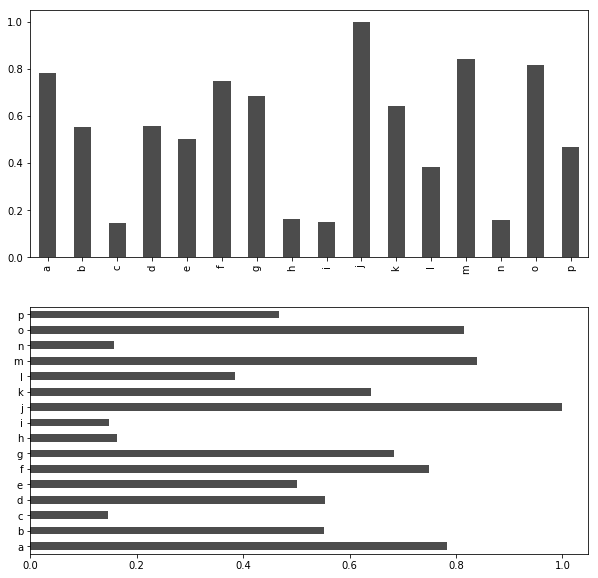

In [56]:
plt.rc('figure', figsize=(10, 10))
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16),
                 index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

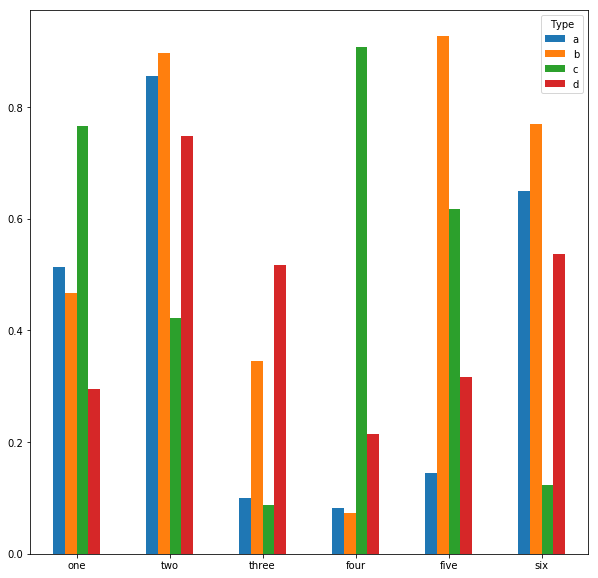

In [63]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index='one two three four five six'.split(),
                  columns=pd.Index('a b c d'.split(),
                  name='Type'))

df

df.plot.bar(rot=0)

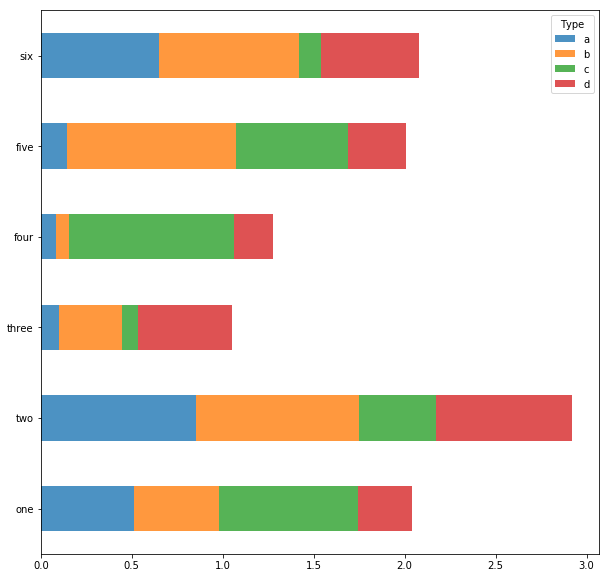

In [66]:
df.plot.barh(stacked=True, alpha=0.8)